# **1. Loading data**

In [23]:
import pandas as pd

df_1 = pd.read_csv("./Database/data_raw.csv")
df_1.head(5)

,SMILES,Target Name,"Target, Subunit, Species",Target Mutant/Chimera Details,Target Species (Bioactivity),Substance Action on Target,Substance Effect,Bioassay Category,Bioassay Name,Bioassay Details,Biological Species/NCBI ID,Medchem: Measurement Parameter,Unit,Qualitative value,Quantitative value,References
0,COC1=C2C(=O)C3=C(C(O)=C4C[C@](O)(C[C@H](O[C@H]...,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,antineoplastic agent,Toxicity/Safety Pharmacology,NaN,NaN,NaN,IC50,μM,NaN,293.2,"Article; Chang, Xing;Wang, Junfang;Bian, Jiang..."
1,COC1=C2C(=O)C3=C(C(O)=C4C[C@](O)(C[C@H](O[C@H]...,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,antineoplastic agent,Toxicity/Safety Pharmacology,NaN,NaN,NaN,IC50,μM,NaN,222.1,"Article; Chang, Xing;Wang, Junfang;Bian, Jiang..."
2,OC1=CC(O)=C2C(OC(=C(O)C2=O)C2=CC=C(O)C(O)=C2)=C1,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,NaN,NaN,In Vitro (Efficacy),Enzymology inhibition,NaN,NaN,IC50,µM,NaN,3.32,"Article; El Amrani, Mustapha; Lai, Daowan; Deb..."
3,OC(=O)C1=CC=CC=C1O,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,NaN,NaN,In Vitro (Efficacy),NaN,Inhibitory activity of the compound against hu...,NaN,qualitative,NaN,Not Published,NaN,Patent; ALTICOR GLOBAL HOLDINGS INC.; US2007/1...
4,NC1=NC=NC2=C1N=CN2[C@@H]1O[C@H](COP(O)(=O)OP(O...,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,NaN,NaN,In Vitro (Efficacy),Enzymology substrate,NaN,NaN,Km (Michaelis constant),µM,NaN,4.09,"Article; Bossi, Roberto T.; Saccardo, M. Beatr..."


# **2.Processing biological activity data**

The collected data encompasses a wide range of different types of experiments (binding affinity assays, inhibition assays, pharmacokinetics) conducted with various measurement units and tested on different types (e.g., ALK_human, ALK_mouse). We need to standardize the type of experiment and measurement unit. Specifically, for the case of inhibitors, the measurement units needed are IC50, pIC50, and logIC50.

## **2.1. Measurement units and target**

Standardized research target: ALK_human (human) and measurement units: IC50, pIC50, and log IC50.

In [9]:
params =["IC50",'pIC50',"Log IC50"]
def measurement_parameter(data, params):
  df_1 = data[data["Medchem: Measurement Parameter"] == params[0]]
  for i in range(1, len(params)):
    df = data[data["Medchem: Measurement Parameter"] == params[i]]
    df_1 = pd.concat((df_1,df), axis = 0)
  return df_1

def target_names(data, name):
  df = data[data["Target Name"] == name]
  return df

params =["IC50",'pIC50',"Log IC50"]
df_2 = measurement_parameter(df_1, params)

target_name = "ALK tyrosine kinase receptor [human]"
df_3 = target_names(data = df_2, name = target_name)
df_3.head(5)

,SMILES,Target Name,"Target, Subunit, Species",Target Mutant/Chimera Details,Target Species (Bioactivity),Substance Action on Target,Substance Effect,Bioassay Category,Bioassay Name,Bioassay Details,Biological Species/NCBI ID,Medchem: Measurement Parameter,Unit,Qualitative value,Quantitative value,References
0,COC1=C2C(=O)C3=C(C(O)=C4C[C@](O)(C[C@H](O[C@H]...,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,antineoplastic agent,Toxicity/Safety Pharmacology,NaN,NaN,NaN,IC50,μM,NaN,293.2,"Article; Chang, Xing;Wang, Junfang;Bian, Jiang..."
1,COC1=C2C(=O)C3=C(C(O)=C4C[C@](O)(C[C@H](O[C@H]...,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,antineoplastic agent,Toxicity/Safety Pharmacology,NaN,NaN,NaN,IC50,μM,NaN,222.1,"Article; Chang, Xing;Wang, Junfang;Bian, Jiang..."
2,OC1=CC(O)=C2C(OC(=C(O)C2=O)C2=CC=C(O)C(O)=C2)=C1,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,NaN,NaN,In Vitro (Efficacy),Enzymology inhibition,NaN,NaN,IC50,µM,NaN,3.32,"Article; El Amrani, Mustapha; Lai, Daowan; Deb..."
120,CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(Cl)C=CC=C2C)=CC(...,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,antineoplastic agent,In Vitro (Efficacy),NaN,NaN,NaN,IC50,μM,NaN,0.64,"Article; van Erp, Anke E. M.; Hillebrandt-Roef..."
121,CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(Cl)C=CC=C2C)=CC(...,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,antineoplastic agent,In Vitro (Efficacy),NaN,NaN,NaN,IC50,μM,NaN,6.88,"Article; van Erp, Anke E. M.; Hillebrandt-Roef..."


## **2.2. Processing Bioassay and Effect on Target data.**

- Regarding bioassay, we only retained "NaN" and "Cell/tumor cell: proliferation/viability/growth," and then proceed with further processing.
- Compounds with missing data in Substance Action on Target, Substance Effect, or detailed Bioassay Details are considered less reliable and should be removed.
- Compounds categorized as Enzymology inhibitors from the beginning were retained.

In [10]:
#Bioassay
def bioassay(data,bioassay_name):
  df = data[data["Bioassay Name"] == bioassay_name]
  df_drop = df[(df['Substance Action on Target'] == "NaN") & (df['Substance Effect'] == "NaN")& (df['Bioassay Details'] == "NaN")]
  if df_drop.shape[0] == 0:
    pass
  else:
    drop_index = df[(df['Substance Action on Target'] == "NaN") & (df['Substance Effect'] == "NaN")& (df['Bioassay Details'] == "NaN")].index
    df = df.drop(drop_index, inplace = True)
  df.reset_index(drop=True, inplace = True)
  return df

#Bioassay = NaN
df_NaN = bioassay(data = df_3, bioassay_name = "NaN")

#Bioassay = "Enzymology inhibitor" --> Retain
df_enzym = df_3[df_3["Bioassay Name"] == "Enzymology inhibition"]

#Bioassay = "Cell/tumor cell"
df_cell = bioassay(data=df_3, bioassay_name = "Cell/tumor cell: proliferation/viability/growth")

#Concat
df_4 = pd.concat((df_NaN, df_enzym, df_cell), axis = 0)
df_4.reset_index(drop=True, inplace = True)
df_4.head(5)

,SMILES,Target Name,"Target, Subunit, Species",Target Mutant/Chimera Details,Target Species (Bioactivity),Substance Action on Target,Substance Effect,Bioassay Category,Bioassay Name,Bioassay Details,Biological Species/NCBI ID,Medchem: Measurement Parameter,Unit,Qualitative value,Quantitative value,References
0,COC1=C2C(=O)C3=C(C(O)=C4C[C@](O)(C[C@H](O[C@H]...,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,antineoplastic agent,Toxicity/Safety Pharmacology,NaN,NaN,NaN,IC50,μM,NaN,293.2,"Article; Chang, Xing;Wang, Junfang;Bian, Jiang..."
1,COC1=C2C(=O)C3=C(C(O)=C4C[C@](O)(C[C@H](O[C@H]...,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,antineoplastic agent,Toxicity/Safety Pharmacology,NaN,NaN,NaN,IC50,μM,NaN,222.1,"Article; Chang, Xing;Wang, Junfang;Bian, Jiang..."
2,CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(Cl)C=CC=C2C)=CC(...,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,antineoplastic agent,In Vitro (Efficacy),NaN,NaN,NaN,IC50,μM,NaN,0.64,"Article; van Erp, Anke E. M.; Hillebrandt-Roef..."
3,CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(Cl)C=CC=C2C)=CC(...,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,antineoplastic agent,In Vitro (Efficacy),NaN,NaN,NaN,IC50,μM,NaN,6.88,"Article; van Erp, Anke E. M.; Hillebrandt-Roef..."
4,CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(Cl)C=CC=C2C)=CC(...,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,antineoplastic agent,In Vitro (Efficacy),NaN,NaN,NaN,IC50,μM,NaN,6.44,"Article; van Erp, Anke E. M.; Hillebrandt-Roef..."


In [11]:
#Removing antinecrotic agent

def effect_drop(data, col_name, drop_value):
  data.reset_index(drop=True, inplace = True)
  index = data[data[col_name]== drop_value].index
  data.drop(index, inplace = True)
  data.reset_index(drop=True, inplace = True)
  return data

df_5 = effect_drop(data = df_4, col_name = "Substance Effect", drop_value = "antinecrotic agent")

## **2.3. Handling Smiles errors**

- After processing the data to filter out entries that do not satisfy the biological criteria, the data is partially refined. We investigated and removed compounds with erroneous or missing Smiles before proceeding with the processing of activity values (IC50).
- After eliminating Smiles with errors, the remaining Smiles were standardized into Canonical Smiles to ensure consistency throughout the entire research process.

In [12]:
from rdkit import Chem

def convert_to_Canonical(data):
  er_idx = []
  data = data.fillna("NaN")
  #Loại bỏ những hàng thiếu Smiles
  data = data[data["SMILES"] != "NaN"]
  data.reset_index(drop=True, inplace = True)
  #Tìm smiles bị lỗi và xóa
  for key, value in enumerate(data["SMILES"]):
    mol = Chem.MolFromSmiles(value)
    if mol == None:
      er_idx.append(key)
    else:
      pass
  print("Error index", er_idx)
  data = data.drop(er_idx, axis = 0).reset_index(drop=True)
  #Chuẩn hóa về Canonical Smiles
  data['Canomical_Smiles'] = data['SMILES'].apply(Chem.CanonSmiles)
  data = data.drop("SMILES", axis = 1)

  return data

df_smiles = convert_to_Canonical(df_5)

[22:49:28] Explicit valence for atom # 23 N, 4, is greater than permitted
[22:49:28] Explicit valence for atom # 22 N, 4, is greater than permitted
[22:49:28] Explicit valence for atom # 11 Cl, 3, is greater than permitted


Error index [4937, 4951, 5291]


# **3. Processing activity values (IC50, pIC50, and logIC50)**

The "Quantitative value" column is one of the most important columns in the entire dataset, so it needs careful processing at this stage:

- There are compounds in this column that are represented as a range. To ensure fairness in the experiments (lower IC50 values indicate better compounds), we chose the upper bound of the range.

- The units of measurement for IC50 may vary. we standardized all values to pChEMBL units.

In [13]:
#Compounds with "Quantitative value" represented as a range (string) will be processed, and the upper bound will be selected for those values.
  
import warnings
  
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 
  
# This warning won't display due to the disabled warnings 
warnings.warn('Error: A warning just appeared') 
col_name = 'Quantitative value'
def range_value(data,col_name):
  idx  = []
  for key, value in enumerate(data[col_name]):
    while True:
        try:
            data.loc[key,col_name] =  float(value)
            break
        except:
            value = data.loc[key:key,col_name].str.split(pat = '-', expand = True).max(axis =1)
            data.loc[key,col_name] =  float(value)
            break

  data[col_name] = data[col_name].astype('float')
  return data

df_6 = range_value(df_smiles, col_name)



Since there are various units of measurement for activity values, it's necessary to convert them all to a single standard unit, which is pChEMBL. This step ensure consistency and comparability across the dataset.

In [14]:
def convert_activity(df):
    #df = df[df["Unit"] != "NaN"]
    df = df[df["Unit"]!= "NaN"]
    df.reset_index(drop=True, inplace = True)
    df['pChEMBL'] = np.zeros(len(df))
    #unit = df['Unit'].unique()

    for key, value in enumerate(df['Unit']):
        if value == 'μM':
            df.loc[key, 'pChEMBL'] = -np.log10(df.loc[key, 'Quantitative value']*1e-6)
        elif value  == 'µM':
            df.loc[key, 'pChEMBL'] = -np.log10(df.loc[key, 'Quantitative value']*1e-6)
        elif value  == 'nM':
            df.loc[key, 'pChEMBL'] = -np.log10(df.loc[key, 'Quantitative value']*1e-9)
        elif value  == 'nmol/l':
            df.loc[key, 'pChEMBL'] = -np.log10(df.loc[key, 'Quantitative value']*1e-9)
        elif value  == 'mM':
            df.loc[key, 'pChEMBL'] = -np.log10(df.loc[key, 'Quantitative value']*1e-3)
        elif value  == 'M':
            df.loc[key, 'pChEMBL'] = -np.log10(df.loc[key, 'Quantitative value']*1)
        elif value  == 'no unit':
            df.loc[key, 'pChEMBL'] = -df.loc[key, 'Quantitative value']

    return df

df_7 = convert_activity(df_6)

# **4. Qualitative value handling**

Handling Qualitative value involves considering the operators (<, >, =, ~, =<, >=) in conjunction with the activity values (Quantitative value). Neglecting the Qualitative value column can reduce the accuracy of the data. Here are the processing steps:

1. Select an activity threshold.

2. For compounds with Qualitative values ~ and =, treat them as =. Remove compounds with Qualitative values of "NaN."

3. For compounds with Qualitative values > and >=, keep them only if the pChEMBL value is greater than the threshold. Otherwise, remove them.

4. For compounds with Qualitative values < and =<, keep them only if the pChEMBL value is less than the threshold. Otherwise, remove them.

These steps help ensure that the data is processed accurately in consideration of the Qualitative value column.

## **4.1. Activity threshold**

There are five FDA approved ALK inhibitors for treating NSCLC

In [15]:
alectinib_smiles = "CCc1cc2c(cc1N1CCC(N3CCOCC3)CC1)C(C)(C)c1[nH]c3cc(C#N)ccc3c1C2=O"
crizotinib_smiles = "C[C@@H](Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)ccc(F)c1Cl"
ceritinib_smiles = "Cc1cc(Nc2ncc(Cl)c(Nc3ccccc3S(=O)(=O)C(C)C)n2)c(OC(C)C)cc1C1CCNCC1"
loratinib_smiles = 'C[C@H]1Oc2cc(cnc2N)-c2c(nn(C)c2C#N)CN(C)C(=O)c2ccc(F)cc21'
brigatinib_smiles = "COc1cc(N2CCC(N3CCN(C)CC3)CC2)ccc1Nc1ncc(Cl)c(Nc2ccccc2P(C)(C)=O)n1"

df_alec = df_7[df_7["Canomical_Smiles"]==alectinib_smiles]
df_crizo = df_7[df_7["Canomical_Smiles"]==crizotinib_smiles]
df_ceri = df_7[df_7["Canomical_Smiles"]==ceritinib_smiles]
df_lora = df_7[df_7["Canomical_Smiles"]==loratinib_smiles]
df_briga = df_7[df_7["Canomical_Smiles"]==brigatinib_smiles]


def pic50_mining(data):
  df = data["pChEMBL"]
  return df.describe()

alec = pic50_mining(df_alec)
crizo = pic50_mining(df_crizo)
ceri = pic50_mining(df_ceri)
d = {"Alectinib":alec,"Crizotinib":crizo,"Ceritinib":ceri}

df_compare = pd.DataFrame(d)
df_compare.head(10)

,Alectinib,Crizotinib,Ceritinib
count,17.000000,69.000000,58.000000
mean,8.005829,6.352686,6.775001
std,1.161619,1.001124,1.241819
min,5.619608,4.535361,2.638971
25%,8.091515,5.718967,6.006718
50%,8.214670,6.275724,6.915211
75%,8.721246,6.996109,7.519319
max,9.229148,8.920819,9.214670


## **4.2. Quanlitative value**

In [16]:
col_name = 'Qualitative value'
y_name = "pChEMBL"
thresh = 7
def qualitative_value(data, col_name,y_name, thresh):
  print("Qualitative value before handling:",data[col_name].unique())
  data = data[data[col_name] != "NaN"]
  #Change "~" to "="
  data[col_name].mask(data[col_name] == '~', '=', inplace=True)

   #Split into smaller group
  df_equal = data[data[col_name] == "="]
  df_bigger = data[(data[col_name] == ">") | (data[col_name] == ">=")]
  df_smaller = data[(data[col_name] == "<") | (data[col_name] == "<=")]
  #Process df_bigger

  df_bigger = df_bigger[(df_bigger[y_name] > thresh)|(df_bigger[y_name] == thresh)]
  #Process df_smaller
  df_smaller = df_smaller[(df_smaller[y_name] < thresh)|(df_smaller[y_name] == thresh)]
  df_smaller[y_name].mask(df_smaller[y_name] == thresh, int(thresh-1), inplace=True)

  #Concat
  df = pd.concat((df_equal, df_smaller,df_bigger), axis = 0)
  df.reset_index(drop=True, inplace = True)
  print("Qualitative value after handling:",df[col_name].unique())
  return df


df_8 = qualitative_value(df_7, col_name, y_name, thresh)

Qualitative value before handling: ['NaN' '=' '>' '<' '~' '>=' '<=']
Qualitative value after handling: ['=' '<' '<=' '>=']


## **4.3. Selecting the reference data point**

Because a single compound measured through various methods may yield different activity results, resulting in multiple pIC50 values, the study decided to use the highest pIC50 value as the representative pIC50 value for that compound's structure.

In [17]:
def drop_duplicate_smiles(data, y_name, smiles_columns,ascending, keep_methods):
  data = data.sort_values(by=y_name, ascending=ascending)
  df = data.drop_duplicates(subset=[smiles_columns], keep= keep_methods)
  return df

df_final = drop_duplicate_smiles(data=df_8, y_name = "pChEMBL", smiles_columns = "Canomical_Smiles", ascending = False, keep_methods = "first")

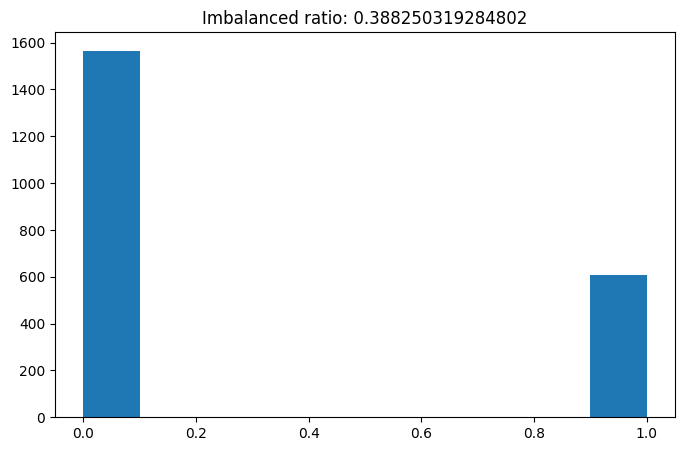

In [18]:
import matplotlib.pyplot as plt
def target_bin(data, thresh, Y_name):
  t1 = data[Y_name] < thresh
  data.loc[t1, Y_name] = 0
  t2 = data[Y_name] >= thresh
  data.loc[t2, Y_name] = 1
  data[Y_name] = data[Y_name].astype('int64')

  plt.figure(figsize = (8,5))
  plt.hist(data[Y_name])
  plt.title(f'Imbalanced ratio: {((data[Y_name].values == 1).sum() / (data[Y_name].values == 0).sum())}')
  plt.show()


target_bin(data=df_final, thresh = 7, Y_name = "pChEMBL")



# **5. Saving**

In [20]:
df_final.to_csv("./Database/" +"ALK_raw_cleaned.csv")

In [19]:
df_final

,Target Name,"Target, Subunit, Species",Target Mutant/Chimera Details,Target Species (Bioactivity),Substance Action on Target,Substance Effect,Bioassay Category,Bioassay Name,Bioassay Details,Biological Species/NCBI ID,Medchem: Measurement Parameter,Unit,Qualitative value,Quantitative value,References,Canomical_Smiles,pChEMBL
232,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,inhibitory activity,In Vitro (Efficacy),NaN,Inhibitory concentration of the compound again...,NaN,IC50,nM,=,0.10,Patent; ASCENTAGE PHARMACEUTICAL GROUP CO LTD;...,CCc1cc2c(=O)c3c4ccc(C#N)cc4[nH]c3n(C(C)C)c2cc1...,1
230,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,inhibitory activity,In Vitro (Efficacy),NaN,Inhibitory concentration of the compound again...,NaN,IC50,nM,=,0.11,Patent; ASCENTAGE PHARMACEUTICAL GROUP CO LTD;...,CCc1cc2c(=O)c3c4ccc(C#N)cc4[nH]c3n(C(C)C)c2cc1...,1
231,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,inhibitory activity,In Vitro (Efficacy),NaN,Inhibitory concentration of the compound again...,NaN,IC50,nM,=,0.22,Patent; ASCENTAGE PHARMACEUTICAL GROUP CO LTD;...,CCc1cc2c(=O)c3c4ccc(C#N)cc4[nH]c3n(C(C)C)c2cc1...,1
149,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,inhibitory activity,In Vitro (Efficacy),NaN,Inhibitory concentration of the compound again...,NaN,IC50,nM,=,0.26,Patent; ASCENTAGE PHARMACEUTICAL GROUP CO LTD;...,CCCc1cc2c(=O)c3c4ccc(C#N)cc4[nH]c3n(C(C)C)c2cc...,1
237,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,inhibitory activity,In Vitro (Efficacy),NaN,Inhibitory concentration of the compound again...,NaN,IC50,nM,=,0.26,Patent; ASCENTAGE PHARMACEUTICAL GROUP CO LTD;...,CCc1cc2c(=O)c3c4ccc(C#N)cc4[nH]c3n(C(C)C)c2cc1...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,inhibitory activity,In Vitro (Efficacy),NaN,In vitro inhibitory activity against growth of...,NaN,IC50,µM,=,10.00,Patent; NOVARTIS AG; Novartis (w/o Sandoz); WO...,CC(C)S(=O)(=O)c1ccccc1Nc1nc(Nc2cc(C(=O)NCCN3CC...,0
372,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,inhibitory activity,In Vitro (Efficacy),NaN,In vitro inhibitory activity against growth of...,NaN,IC50,µM,=,10.00,Patent; NOVARTIS AG; Novartis (w/o Sandoz); WO...,CC(C)Oc1cc2c(cc1Nc1ncc(Cl)c(Nc3ccccc3S(=O)(=O)...,0
371,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,inhibitory activity,In Vitro (Efficacy),NaN,In vitro inhibitory activity against growth of...,NaN,IC50,µM,=,10.00,Patent; NOVARTIS AG; Novartis (w/o Sandoz); WO...,CC(C)Oc1cc(C2CCN(CCO)CC2)ccc1Nc1nc(Nc2ccccc2S(...,0
370,ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human],ALK tyrosine kinase receptor [human]:Wild,human,Inhibitor,inhibitory activity,In Vitro (Efficacy),NaN,In vitro inhibitory activity against growth of...,NaN,IC50,µM,=,10.00,Patent; NOVARTIS AG; Novartis (w/o Sandoz); WO...,CNC(=O)c1ccc(-c2cc(OC)c(Nc3ncc(Cl)c(Nc4ccccc4S...,0
